In [1]:
import celluloid
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
plt.style.use("ggplot")
np.random.seed(42)
from scipy.spatial.distance import cdist

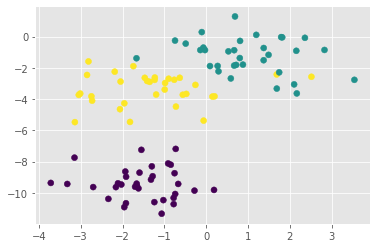

In [2]:
n_features, n_centers = 2, 3
X, y = ds.make_blobs(100, n_features, n_centers, random_state=2)
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
fig = plt.figure(figsize=(5, 5))
camera = celluloid.Camera(fig)
plt.tight_layout()

centroids = np.random.random_sample((n_centers, n_features))

for i in range(10):
    cluster_assignment = np.argmin(cdist(X, centroids), axis=1)
    for i in range(n_centers):
        if 0 < (cluster_assignment==i).sum():
            centroids[i] = X[(cluster_assignment == i)].mean(axis=0)
    plt.scatter(X[:,0],X[:,1],c=cluster_assignment)
    plt.scatter(centroids[:,0], centroids[:,1], color="red", marker="x")
    camera.snap()
camera.animate(interval=200).save('kmeans.gif', writer='imagemagick', fps=1)

![animation](kmeans.gif)